In [251]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import json
import re
import ssl

import certifi
import networkx as nx

In [40]:
df = pd.read_csv("data/connections_test2.csv",encoding="utf-8-sig")

In [10]:
df.tail()

,Unnamed: 0,nazwa_pociagu,stacja_wyjazdu,stacja_przyjazdu,data,czas_rozkladowy,opoznienie,opoznienie_netto
71223,28555,MPS 88105 ZAMOYSKI,Wieleń,Krzyż,24.03,18:32,10.0,0.0
71224,28556,MPS 88105 ZAMOYSKI,Krzyż,Nowe Drezdenko,24.03,18:44,10.0,0.0
71225,28557,MPS 88105 ZAMOYSKI,Nowe Drezdenko,Strzelce Krajeńskie Wschód,24.03,18:59,10.0,0.0
71226,28558,MPS 88105 ZAMOYSKI,Strzelce Krajeńskie Wschód,Gorzów Wielkopolski Wschodni,24.03,19:24,10.0,0.0
71227,28559,MPS 88105 ZAMOYSKI,Gorzów Wielkopolski Wschodni,Gorzów Wielkopolski,24.03,19:30,8.0,-2.0


In [11]:
# szukanie nodes (nadanie)
#połączenie krawędzi na stacjach, które się rozgałęziają
#nadanie im nazwy <stacja początkowa - stacja końcowa>


In [25]:
# szukanie większych nodesów
#(jeśli stacje się powtarzają, to są nodesami)

#niepotrzebne na ten moment
# start = df["stacja_wyjazdu"]
# start_unique =pd.DataFrame(df["stacja_wyjazdu"].unique())
# start_unique.rename(columns={0:"start"})
# start_unique["ilosc"] = 0

In [48]:
# len(start_unique), len(start)
# start_unique
unique_connections = df[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()

In [50]:
unique_connections

,stacja_wyjazdu,stacja_przyjazdu
0,Warszawa Wschodnia,Warszawa Centralna
1,Warszawa Centralna,Warszawa Zachodnia
2,Warszawa Zachodnia,Grodzisk Mazowiecki
3,Grodzisk Mazowiecki,Opoczno Południe
4,Opoczno Południe,Włoszczowa Północ
...,...,...
70870,Czersk,Łąg
70871,Łąg,Czarna Woda
70872,Czarna Woda,Kaliska
70873,Kaliska,Starogard Gdański


In [94]:
# start_count = unique_connections.pivot_table(index = ['stacja_wyjazdu'], aggfunc ={'stacja_przyjazdu':'count'})
start_count = pd.pivot_table(unique_connections, index = ['stacja_wyjazdu'], aggfunc ={'stacja_przyjazdu':'count'}).reset_index()

In [95]:
# start_count.rename(columns={"stacja_przyjadu":"ilosc"})
start_count

,stacja_wyjazdu,stacja_przyjazdu
0,Aleksandrów Kujawski,2
1,Augustów,2
2,Babiak,2
3,Babimost,2
4,Baciuty,3
...,...,...
415,Żary,2
416,Żmigród,2
417,Żory,2
418,Żychlin,2


In [98]:
start_nodes = start_count[start_count['stacja_przyjazdu'] !=1]
start_nodes = start_nodes[start_nodes['stacja_przyjazdu'] !=2]
start_nodes

,stacja_wyjazdu,stacja_przyjazdu
4,Baciuty,3
8,Biała Podlaska,3
9,Białogard,4
10,Białystok,5
15,Bochnia,3
...,...,...
394,Łowicz Główny,4
395,Łuków,3
396,Łódź Chojny,4
400,Łódź Widzew,5


In [238]:
glowne_nodes = np.array(start_nodes['stacja_wyjazdu']) # niech to będą te stacje, które zostają 
#choć still jest ich jeszcze dużo
len(glowne_nodes)

136

In [302]:
tail = unique_connections.tail(20)
tail
# unique_connections.iloc[580:600,:]

,stacja_wyjazdu,stacja_przyjazdu
70761,Strzelin,Wrocław Główny
70772,Gorzów Wielkopolski,Gorzów Wielkopolski Wschodni
70773,Gorzów Wielkopolski Wschodni,Strzelce Krajeńskie Wschód
70774,Strzelce Krajeńskie Wschód,Nowe Drezdenko
70775,Nowe Drezdenko,Krzyż
70776,Krzyż,Wieleń
70777,Wieleń,Trzcianka
70778,Trzcianka,Piła Główna
70856,Kostrzyn,Witnica
70857,Witnica,Gorzów Wielkopolski


In [319]:
uniq_con_temp = unique_connections.head(30)
uniq_con_temp

,stacja_wyjazdu,stacja_przyjazdu
0,Warszawa Wschodnia,Warszawa Centralna
1,Warszawa Centralna,Warszawa Zachodnia
2,Warszawa Zachodnia,Grodzisk Mazowiecki
3,Grodzisk Mazowiecki,Opoczno Południe
4,Opoczno Południe,Włoszczowa Północ
5,Włoszczowa Północ,Zawiercie
6,Zawiercie,Dąbrowa Górnicza
7,Dąbrowa Górnicza,Sosnowiec Główny
8,Sosnowiec Główny,Katowice
9,Katowice,Tychy


In [ ]:
#schetmat działania
# - {"superwezeł_start - superwęzeł_end":['superwęzeł_start', 'kolejna_stacja', 'inna_stacja',..., 'superwęzeł_end']}


# comment 
# - może nie uwzględniać ostatniej stacji ups

## DZIAŁA I TO JEST TA POPRAWNA WERSJA

In [325]:
# AKTUALNA WERSJA - działa jeśli chodzi o listę z wierzchołkami

def new_connection_dic(glowne_nodes, uniq_con):
    """
    @glowne_nodes: superwierzchołki, czyli stacje z których wyjezdzają pociągi w róznych kierunkach
    @uniq_con: data.frame z unikalnymi połączeniami (dwie kolummny pierwsze- stacja wyjazdu i stacja przyjazdu)
    """
    new_con_dic = {}

    stations_between_tab = []
    for row in range(len(uniq_con)):
        station = uniq_con.iloc[row,0]
        prev_station_end = uniq_con.iloc[row-1,1]

        if row !=(len(uniq_con)-1):

            if station in glowne_nodes:
                stations_between_tab.append(station)
                if len(stations_between_tab) > 1: #potrzebny, bo inaczej powstawało połączenie z jednym węzłem
                    if station != prev_station_end:
                        stations_between_tab[-1] = prev_station_end
                        new_con_dic[f'{stations_between_tab[0]} - {stations_between_tab[-1]}'] = stations_between_tab
                        stations_between_tab = [station]
                    else:
                        new_con_dic[f'{stations_between_tab[0]} - {stations_between_tab[-1]}'] = stations_between_tab
                        stations_between_tab= [station]
            else:
                stations_between_tab.append(station)
                if station != prev_station_end:
                    stations_between_tab[-1] = prev_station_end
                    new_con_dic[f'{stations_between_tab[0]} - {stations_between_tab[-1]}'] = stations_between_tab
                    stations_between_tab = [station]


        else:# żeby ostatnie połączenie z tabeli było uwzględnione
            stations_between_tab.append(station)
            station_end = uniq_con.iloc[row,1]
            stations_between_tab.append(station_end)
            print('Ostatnia lista:',stations_between_tab)
            new_con_dic[f'{stations_between_tab[0]} - {stations_between_tab[-1]}'] = stations_between_tab

        # print(stations_between_tab)
    return(new_con_dic)


#nie wyświetla się ostatnie połączenie

In [336]:
# tab_head = new_connection_dic(glowne_nodes,uniq_con_temp)
# tab_head

In [328]:
# new_tab = new_connection_dic(glowne_nodes,unique_connections)
# list(new_tab.items())[-5:]


In [324]:
new_tab['Katowice - Zabrze'], new_tab['Zabrze - Katowice']

(['Katowice', 'Chorzów\xa0Batory', 'Zabrze'],
 ['Zabrze', 'Chorzów\xa0Batory', 'Katowice'])

In [320]:
"Racibórz" in glowne_nodes

True

In [240]:
# len(new_tab) #1140 na początku było połączeń, teraz jest 549
# new_tab # nie wyświetla kilku ostatnich połączeń

In [329]:
# tail_tab = new_connection_dic(glowne_nodes,tail)
# tail_tab

In [225]:
# len(new_con_dic)
# list(new_con_dic.items())[10:]
# new_con_dic


25

## ZAMIANA W SŁOWNiku węzłów na krawędzie

In [352]:
# heheheh

def new_connection_dic_edges(glowne_nodes, uniq_con):
    """
    @glowne_nodes: superwierzchołki, czyli stacje z których wyjezdzają pociągi w róznych kierunkach
    @uniq_con: data.frame z unikalnymi połączeniami (dwie kolummny pierwsze- stacja wyjazdu i druga - stacja przyjazdu)
    """
    new_con_dic = {}

    stations_between_tab = []
    for row in range(len(uniq_con)):
        station = uniq_con.iloc[row,0] #0 to kolumna 'stacja wyjazdu'
        station_end = uniq_con.iloc[row,1] #1 to kolumna 'stacja przyjazdu'
        prev_station = uniq_con.iloc[row-1,0]
        prev_station_end = uniq_con.iloc[row-1,1]

        # if row !=(len(uniq_con)-1):

        if station in glowne_nodes:
            if len(stations_between_tab) > 1: #potrzebny, bo inaczej powstawało połączenie z jednym węzłem
                if station != prev_station_end:
                    stations_between_tab[-1] = f"{prev_station}-{prev_station_end}"
                    #zmienić działanie przypisania nazwy klucza
                    start_node = stations_between_tab[0].split('-')[0]
                    end_node = stations_between_tab[-1].split('-')[-1]
                    new_con_dic[f'{start_node} - {end_node}'] = stations_between_tab
                    stations_between_tab = [f"{station}-{station_end}"]
                else:
                    start_node = stations_between_tab[0].split('-')[0]
                    end_node = stations_between_tab[-1].split('-')[-1]
                    new_con_dic[f'{start_node} - {end_node}'] = stations_between_tab
                    stations_between_tab= [f"{station}-{station_end}"]
            else:
                stations_between_tab.append(f"{station}-{station_end}")
        else:
            stations_between_tab.append(f"{station}-{station_end}")
            if station != prev_station_end:
                stations_between_tab[-1] = f"{prev_station}-{prev_station_end}"
                start_node = stations_between_tab[0].split('-')[0]
                end_node = stations_between_tab[-1].split('-')[-1]
                new_con_dic[f'{start_node} - {end_node}'] = stations_between_tab
                stations_between_tab = [f"{station}-{station_end}"]


        # else:# żeby ostatnie połączenie z tabeli było uwzględnione
        #     stations_between_tab.append(station)
        #     station_end = uniq_con.iloc[row,1]
        #     stations_between_tab.append(station_end)
        #     print('Ostatnia lista:',stations_between_tab)
        #     new_con_dic[f'{stations_between_tab[0]} - {stations_between_tab[-1]}'] = stations_between_tab

        # print(stations_between_tab)
    return(new_con_dic)


#nie wyświetla się ostatnie połączenie

In [340]:
# a = ['Warszawa\xa0Wschodnia-Warszawa\xa0Centralna',
#   'Warszawa\xa0Centralna-Warszawa\xa0Zachodnia',
#   'Warszawa\xa0Zachodnia-Grodzisk\xa0Mazowiecki']
# a[-1].split("-")[0]

In [354]:
'Grodzisk\xa0Mazowiecki' in glowne_nodes

True

In [353]:
new_connection_dic_edges(glowne_nodes, uniq_con_temp)

{'Warszawa\xa0Wschodnia - Warszawa\xa0Zachodnia': ['Warszawa\xa0Wschodnia-Warszawa\xa0Centralna',
  'Warszawa\xa0Centralna-Warszawa\xa0Zachodnia'],
 'Warszawa\xa0Zachodnia - Opoczno\xa0Południe': ['Warszawa\xa0Zachodnia-Grodzisk\xa0Mazowiecki',
  'Grodzisk\xa0Mazowiecki-Opoczno\xa0Południe'],
 'Opoczno\xa0Południe - Zawiercie': ['Opoczno\xa0Południe-Włoszczowa\xa0Północ',
  'Włoszczowa\xa0Północ-Zawiercie'],
 'Zawiercie - Sosnowiec\xa0Główny': ['Zawiercie-Dąbrowa\xa0Górnicza',
  'Dąbrowa\xa0Górnicza-Sosnowiec\xa0Główny'],
 'Sosnowiec\xa0Główny - Tychy': ['Sosnowiec\xa0Główny-Katowice',
  'Katowice-Tychy'],
 'Tychy - Chałupki': ['Tychy-Rybnik',
  'Rybnik-Wodzisław\xa0Śląski',
  'Wodzisław\xa0Śląski-Chałupki'],
 'Chałupki - Zawiercie': ['Chałupki-Bohumin',
  'Warszawa\xa0Zachodnia-Zawiercie'],
 'Zawiercie - Pszczyna': ['Zawiercie-Sosnowiec\xa0Główny', 'Tychy-Pszczyna'],
 'Pszczyna - Petrovice\xa0u\xa0Karvine': ['Pszczyna-Zebrzydowice',
  'Zebrzydowice-Petrovice\xa0u\xa0Karvine',
  'Zebrz

PRÓBA DODANIA NOWEJ KOLUMNY ALBO przynajmniej zrobienia czegokolwiek

In [250]:
# df['nazwa_pociagu'].drop_duplicates()

# new_df = df.drop_duplicates(['stacja_wyjazdu','stacja_przyjazdu']) #stacje się nie powtarzają


# new_df[new_df['nazwa_pociagu'].str.contains("ECE 14006/7 SILESIA")]


#spróbować po nazwie pociągu, jeśli dany pociąg np SILESIA ma aby jedną trasę, wtedy by było szuaknie po nazwie i
#  jeśli jest ten pociąg to np <gdynia - kraków>

#tylko w środku trasy mogą byś główne_nodes

# wyplotowanie mapy z tylko głównymi nodesami

In [252]:
# to potrzebne, bo inaczej wyskakuje GeocoderServiceError, ale ogólnie bardzo niewskazane XD
ssl._create_default_https_context = ssl._create_unverified_context

In [253]:
pos = json.load(open("station_pos_new.json","r", encoding="utf-8"))

pos["Jarosław"] = [22.677651659198048, 50.011096189470834]
pos["Chałupki"] = [18.311526302001212, 49.925748636690045]
pos["Kostrzyn"] = [14.647305794898253, 52.591351788760555]

In [279]:
new_pos = {}

pos_keys = list(pos.keys())
pos_val = list(pos.values())
for p in range(len(pos_keys)):
    if pos_keys[p] in glowne_nodes:
        new_pos[pos_keys[p]] = pos_val[p]

In [281]:
# len(new_pos)

136

In [287]:
test_trains = df["nazwa_pociagu"].unique()
nodes = list(new_pos.keys())

In [289]:
# uniq_connections = df[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()
# uniq_connections = [(conn[1],conn[2]) for conn in uniq_connections.itertuples()]
# uniq_connections.sort()

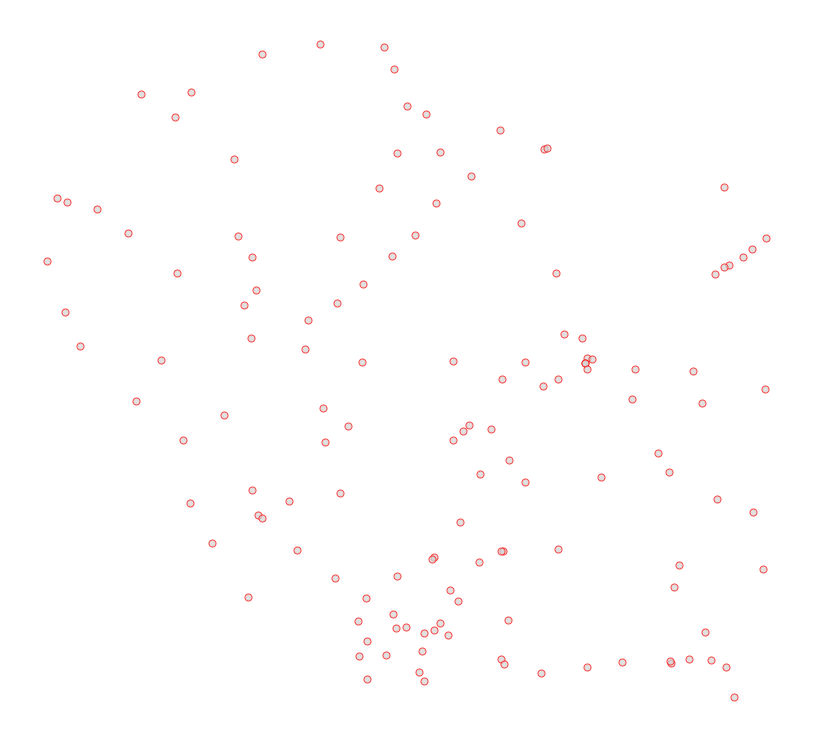

In [294]:
# SAME GŁÓWNE NODESY

plt.figure(figsize=(11,10))
G = nx.Graph()
G.add_nodes_from(nodes)
# G.add_edges_from(uniq_connections)
labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')